In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import time
import numpy as np
start_time = time.time()
def elapsed(sec):
    if sec<60:
        return str(sec) + " sec"
    elif sec<(60*60):
        return str(sec/60) + " min"
    else:
        return str(sec/(60*60)) + " hr"

import tensorflow as tf
# 设置 GPU 按需增长
NUM=2
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784, 500], stddev=0.1),name="W1")
b1 = tf.Variable(tf.constant(0.1, shape=[500]),name="b1") 
a1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
W2 = tf.Variable(tf.truncated_normal([500, 200], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[200]))
a2 = tf.nn.tanh(tf.matmul(a1, W2) + b2)
W3 = tf.Variable(tf.truncated_normal([200, NUM], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[NUM]))
a3 = tf.nn.tanh(tf.matmul(a2,W3)+b3)
W4 = tf.Variable(tf.truncated_normal([NUM, 500], stddev=0.1))
b4 = tf.Variable(tf.constant(0.1, shape=[500]))
a4 = tf.nn.tanh(tf.matmul(a3, W4) + b4)
W5 = tf.Variable(tf.truncated_normal([500, 200], stddev=0.1))
b5 = tf.Variable(tf.constant(0.1, shape=[200]))
a5 = tf.nn.tanh(tf.matmul(a4, W5) + b5)
W6 = tf.Variable(tf.truncated_normal([200, 784], stddev=0.1))
b6 = tf.Variable(tf.constant(0.1, shape=[784]))
y = (tf.matmul(a5, W6) + b6)


labels = tf.placeholder(tf.float32, [None, 784])
loss =tf.losses.mean_squared_error(labels,y)

train_step = tf.train.AdamOptimizer(0.00001).minimize(loss)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#batch_xs, batch_ys = mnist.train.next_batch(10240)
i=0


writer = tf.summary.FileWriter(r"E:\远程tensorflow\MNIST_AUTO_ENCODER\test",sess.graph)
tf.summary.scalar('loss', loss)
merged_summary = tf.summary.merge_all()
while(1):
    batch_xs, batch_ys = mnist.train.next_batch(2048)
    _,cost=sess.run([train_step,loss], feed_dict={x: batch_xs, labels: batch_xs})
    i+=1
    if i%100==0:
        s=sess.run(merged_summary,feed_dict={x: batch_xs, labels: batch_xs})
        writer.add_summary(s,i)
    if i % 1000 == 0:
        print("i="+str(i))
        print("acc=",cost)
        
#append第一个神经网路的结果
#bl=(tf.argmax(batch_ys, 1)+tf.argmax(batch_yss, 1))%2


print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
p=sess.run(a3,feed_dict={x: mnist.test.images, y_: mnist.test.labels})
import matplotlib.pyplot as plt

print(p.shape)
xs, ys = mnist.train.next_batch(100)


print("Elapsed time: ", elapsed(time.time() - start_time))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
i=1000
acc= 0.07045348
i=2000
acc= 0.06264687
i=3000
acc= 0.058073495
i=4000
acc= 0.057132106
i=5000
acc= 0.056286093
i=6000
acc= 0.056797072
i=7000
acc= 0.056465562
i=8000
acc= 0.055380072
i=9000
acc= 0.05544264
i=10000
acc= 0.05511317
i=11000
acc= 0.053921126
i=12000
acc= 0.054317843
i=13000
acc= 0

KeyboardInterrupt: 

In [3]:
%matplotlib inline

(10000, 2)
(10000,)


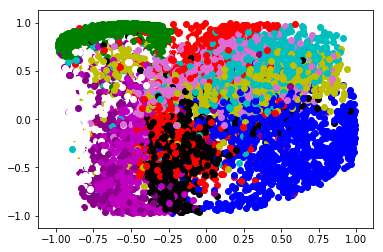

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data=sess.run(a3,feed_dict={x:mnist.test.images})
print(data.shape)
label=np.argmax(mnist.test.labels,axis=1)
print(label.shape)
num=10
fig = plt.figure('label')
color=['b','g','r','c','m','y','k','w','#DA70D6','#8B008B','#483D8B','00FFFF','#556B2F']
for _ in range(len(label)):
        plt.scatter(data[_, 0], data[_, 1], c=color[label[_]], marker='o')
plt.show()

In [ ]:
print(data)